In [1]:
import random
import math
import numbers
import numpy as np
import matplotlib.pyplot as plt
import time

Based on SciKit-Learn datasets.make_blobs (https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/samples_generator.py)

In [257]:
def make_circles(grid = 11, n_data = 10):    
    max_distance = int((grid-1)/2)
    radii = np.random.randint(max_distance/2.,max_distance,size = (n_data, 2))
    radii = radii.flatten()
    distance = np.random.randint(max_distance, size = n_data)
    distances = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in distance])
    radii1 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[::2]])
    radii2 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[1::2]])
    circle = np.zeros((n_data, grid, grid))
    circlex = np.zeros((grid, grid))
    circley = np.zeros((grid, grid))
    circlex[:][:][:] = np.arange(grid)
    circley[:][:][:] = np.transpose(circlex)
    x1 = circley - max_distance + distances/2
    x2 = circley - max_distance - distances/2
    y = circlex - max_distance
    position1 = np.sqrt(x1**2+y**2)
    position2 = np.sqrt(x2**2+y**2)
    fill1 = position1 <= radii1
    fill2 = position2 <= radii2
    p1 = np.exp((-1./2.)*(3.*position1/radii1)**2.)
    p2 = np.exp((-1./2.)*(3.*position2/radii2)**2.)
    p1 = np.where(fill1, p1, 0.0)
    p2 = np.where(fill2, p2, 0.0)
    circles = p1 + p2
    radii = radii.reshape(n_data, 2)
    return circles, radii, distances.reshape(n_data*grid**2,1)[::grid**2]
    

In [263]:
grid = 100
n_data = 500
tic = time.clock()
circleData, radiiLabels, distanceLabels = make_circles(grid, n_data)
toc = time.clock()
print toc-tic

0.537364


radius = 
[45 48]
distance between centers = 
[17.]


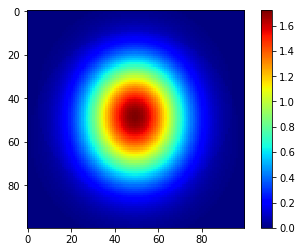

In [264]:
display = circleData[30].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print "radius = "
print radiiLabels[30]
print "distance between centers = "
print distanceLabels[30]
plt.colorbar()